# Octupole - Comparing to Bmad

In [1]:
import numpy as np
from pmd_beamphysics import single_particle
from pmd_beamphysics.units import mec2
from pytao import Tao

import impact.z as IZ
from impact.tests.z.conftest import bmad_files
from impact.z.interfaces.bmad import plot_impactz_and_tao_stats, track_tao

## Initial Particles 

In [2]:
energy = 10e6
pz = np.sqrt(energy**2 - mec2**2)
P0 = single_particle(x=1e-3, pz=pz)

## Tao

In [3]:
!cat $bmad_files/octupole.bmad

! Lattice file adapted from simple.bmad
no_digested
beginning[beta_a] = 10.   ! m  a-mode beta function
beginning[beta_b] = 10.   ! m  b-mode beta function
beginning[e_tot] = 10e6   ! eV   Or can set beginning[p0c]

parameter[geometry] = open          ! Or closed
parameter[particle] = electron      ! Reference particle.

octupole1:         octupole, l = 4.5, k3 = 1e3, num_steps = 10
! tilt, x_offset = 0.01, y_pitch = 0.001

lat: line = (octupole1)
use, lat


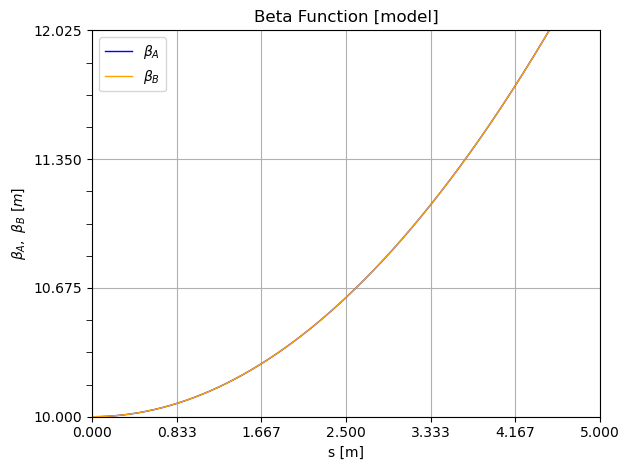

In [4]:
tao = Tao(lattice_file=bmad_files / "octupole.bmad", plot="mpl")
tao.plot("beta", include_layout=False)

In [5]:
Ptao = track_tao(tao, P0)

<!-- lume-impact detected Jupyter and will use HTML for rendering. -->

  0%|          | 0/2 [00:00<?, ?ele/s]

## Impact-Z

In [6]:
I = IZ.ImpactZ.from_tao(tao, initial_particles=P0)

In [7]:
I.input.multipoles

[Multipole(
     name='OCTUPOLE1',
     metadata={'bmad_csr': False, 'bmad_sc': False, 'bmad_id': 1},
     length=4.5,
     steps=10,
     map_steps=10,
     type_id=5,
     multipole_type=IZ.MultipoleType.octupole,
     field_strength=-33.3128309370517,
     file_id=-1.0,
     radius=0.03,
     misalignment_error_x=0.0,
     misalignment_error_y=0.0,
     rotation_error_x=0.0,
     rotation_error_y=0.0,
     rotation_error_z=-0.0
 )]

In [8]:
output = I.run()

<!-- lume-impact detected Jupyter and will use HTML for rendering. -->

  0%|          | 0/7 [00:00<?, ?it/s]

In [9]:
P = I.output.particles["final_particles"]

# Compare

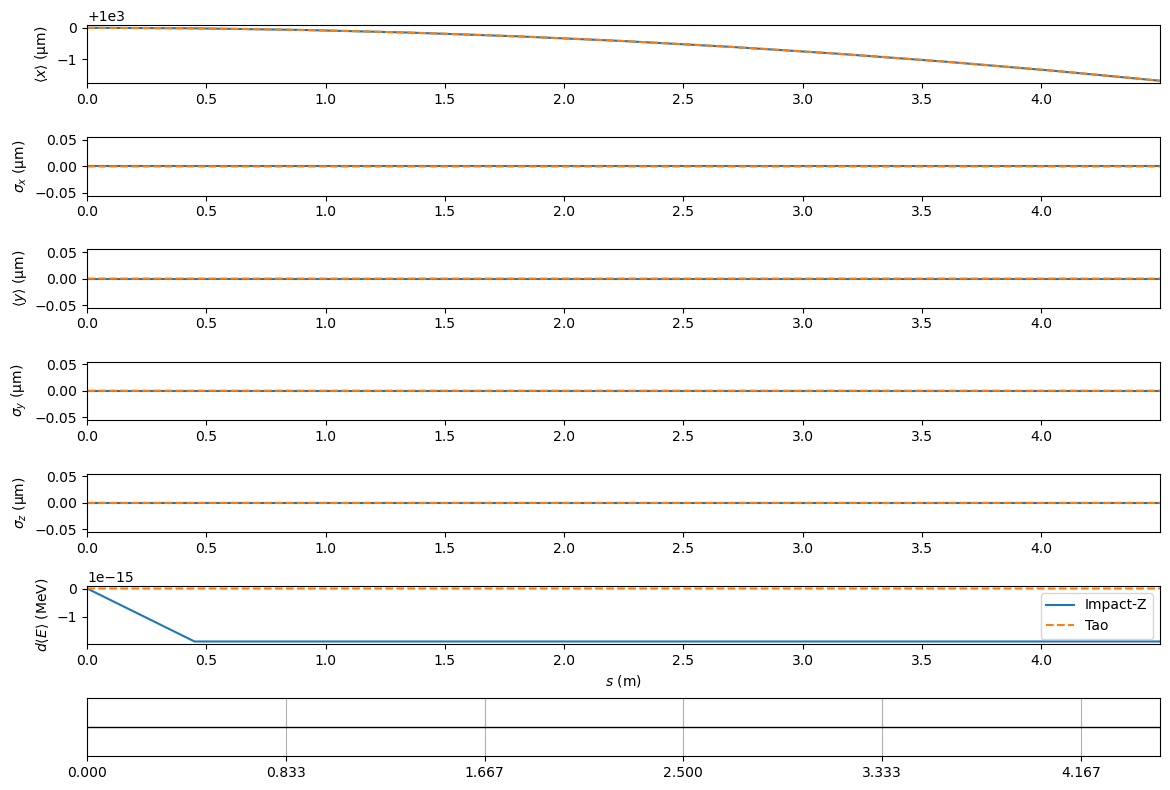

In [10]:
plot_impactz_and_tao_stats(I, tao)

In [11]:
Ptao.data

{'x': array([0.00099831]),
 'px': array([-7.47758106]),
 'y': array([0.]),
 'py': array([0.]),
 'z': array([0]),
 'pz': array([9986935.46951906]),
 't': array([1.50300203e-08]),
 'status': array([1], dtype=int32),
 'weight': array([1.]),
 'species': np.str_('electron')}

In [12]:
P.data

{'x': array([0.00099831]),
 'px': array([-7.47770693]),
 'y': array([0.]),
 'py': array([0.]),
 'z': array([0.]),
 'pz': array([9986935.46951905]),
 't': array([1.50300203e-08]),
 'status': array([1.]),
 'weight': array([1.e-20]),
 'id': array([1]),
 'species': np.str_('electron')}